In [10]:
import pandas as pd
dir="C:\\Users\\Administrator\\Desktop\\夹层解释文件\\夹层分析文件-417.xlsx"
df=pd.read_excel(dir)
df_4211=df[df["井号"]=="H42-111"]
df_201=df[df["井号"]=="H201"]
df_208=df[df["井号"]=="H208"]
df_212=df[df["井号"]=="H212"]
df_213=df[df["井号"]=="H213"]
df_204=df[df["井号"]=="H204"]
a=[df_204,df_212,df_201,df_4211,df_213]
df=pd.concat(a)
X=["DEPT","DT","SP","GR","RD","RS","DEN","夹层标定"]
# X=["DT","SP","GR","RS","DEN","夹层标定"]
# # Y=["DT","SP","GR","RS","DEN","夹层标定","夹层"]
df_train1=df[X].loc[:,["夹层标定","DT","SP","GR","RS","DEN","DEPT"]].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_test=df_208[X].loc[:,["夹层标定","DT","SP","GR","RS","DEN","DEPT"]].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


In [2]:
df["夹层标定"].value_counts()

0    1310
1     229
2     185
Name: 夹层标定, dtype: int64

In [3]:
df_train1["夹层标定"].value_counts()

0    1310
1     229
2     185
Name: 夹层标定, dtype: int64

In [11]:
lei_0=df_train1[df_train1["夹层标定"]==0].sample(frac=0.1) 
lei_1=df_train1[df_train1["夹层标定"]==1]
lei_2=df_train1[df_train1["夹层标定"]==2].sample(frac=0.3) 
df_train=pd.concat([lei_0,lei_1,lei_2])
df_train["夹层标定"].value_counts()

1    229
0    131
2     56
Name: 夹层标定, dtype: int64

In [13]:
lei_0=df_train1[df_train1["夹层标定"]==0].sample(frac=0.1) 
lei_1=df_train1[df_train1["夹层标定"]==1]
lei_2=df_train1[df_train1["夹层标定"]==2].sample(frac=0.3) 
df_train=pd.concat([lei_0,lei_1,lei_2])
#目标值分析
import numpy as np
kww=["DT","SP","GR","RS","DEN"]
kuangwu=["夹层标定"]
# df_r=df_zon[kw]
# dff=df_zon

Y_scale = df_train[kuangwu].to_numpy()
# print((Y_scale==1).sum())
Y_scale=np.array(Y_scale)
Y_scale=Y_scale.reshape(-1,1)
X_scale= df_train[kww].to_numpy()
# from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# 指定放缩范围
scaler = MinMaxScaler(feature_range=(0, 1))
###数据归一化########
X_scale = scaler.fit_transform(X_scale) 
# Y_scale = scaler.fit_transform(Y_scale )
# #目标值分析
import numpy as np
# Y_scale1 = df1[["钾长石","斜长石","高岭石","方解石"]]
# H213=df1[kw]
# df1=df_213
Y_scale1 =df_test[kuangwu].to_numpy()
# print((Y_scale1==1).sum())
Y_scale1=np.array(Y_scale1)
Y_scale1=Y_scale1.reshape(-1,1)
X_scale1= df_test[kww].to_numpy()
from sklearn.preprocessing import MinMaxScaler
# 指定放缩范围
scaler = MinMaxScaler(feature_range=(0, 1))
###数据归一化########
X_scale1 = scaler.fit_transform(X_scale1)
# Y_scale1 =scaler.fit_transform(Y_scale1) 
#######K近邻模型######
import pandas as pd
from matplotlib import pyplot as plt
import time
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import confusion_matrix
import warnings

warnings.filterwarnings("ignore")
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#############数据########################
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X_scale, Y_scale, test_size=0.05, shuffle=True)
# svmf = SVC()
clf = KNeighborsClassifier()  #实例化
param_grid = {'n_neighbors': [x for x in range(2,20)]}
clf = GridSearchCV(clf, param_grid, cv=10)
cf = clf.fit(X_train, y_train)
print("训练集", clf.score(X_train, y_train))
print("测试集", clf.score(X_test, y_test))
print('查看选择的参数模型：', clf.best_params_)
# C2 = confusion_matrix(P_test, y_test, labels=[0,1,2])
# print(C2)
print("训练集", clf.score(X_scale1,Y_scale1))
# C3= confusion_matrix(clf.predict(X_scale1),Y_scale1, labels=[0,1,2])
# print(C3)

训练集 0.9746835443037974
测试集 0.8095238095238095
查看选择的参数模型： {'n_neighbors': 2}
训练集 0.7802197802197802


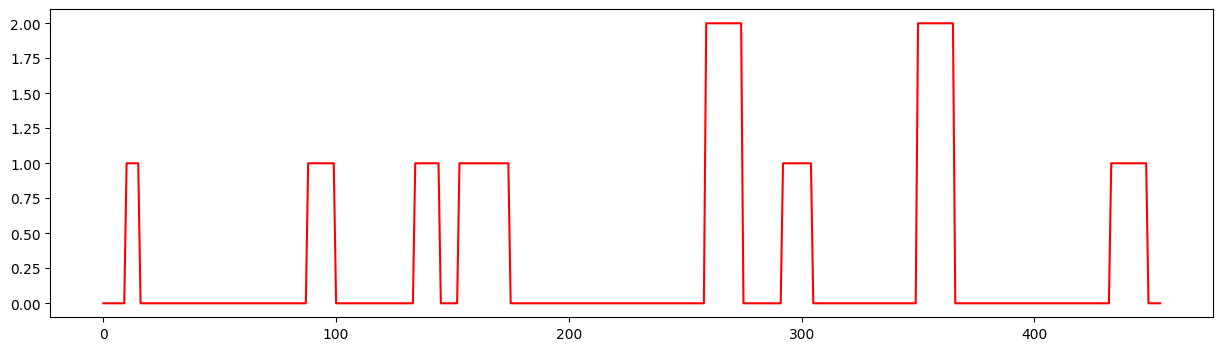

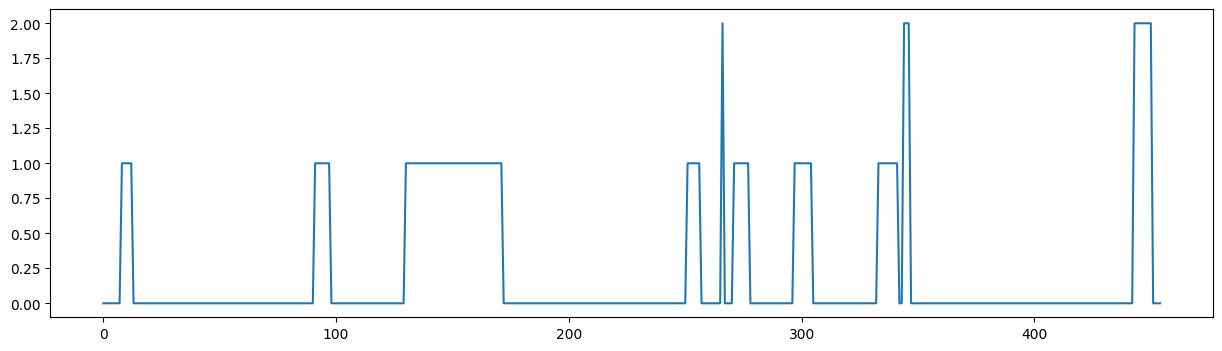

In [14]:
import pandas as pd
# dir="C:\\Users\\Administrator\\Desktop\\H213.xlsx"
jieguo=pd.read_excel(dir)
plt.figure(figsize=(15,4))
plt.plot(Y_scale1,color="r")
plt.show()
plt.figure(figsize=(15,4))
plt.plot(clf.predict(X_scale1))
plt.show()

In [297]:
# 导入包
import joblib 

# 保存模型
joblib.dump(clf,'C:\\Users\\Administrator\\Desktop\\excel数据\\TRY-1\\0.80预测模型.dat')  # 第二个参数只需要写文件名字,是不是比pickle更人性化

# 加载模型
# loaded_model2 = joblib.load('C:\\Users\\Administrator\\Desktop\\H208\\预测模型.dat')

# 使用模型
# pd.DataFrame(loaded_model2.predict(X_scale2)).to_excel("C:\\Users\\Administrator\\Desktop\\208(全井预测2).xlsx")


['C:\\Users\\Administrator\\Desktop\\excel数据\\TRY-1\\0.80预测模型.dat']

In [994]:
pd.DataFrame(clf.predict(X_scale1)).to_excel("C:\\Users\\Administrator\\Desktop\\excel数据\\TRY-1\\H42111_0.58.xlsx")

In [64]:
df_train["夹层标定"].value_counts()

1    245
0    158
2     51
Name: 夹层标定, dtype: int64

In [65]:
df_test["夹层标定"].value_counts()

0    303
1    169
2     11
Name: 夹层标定, dtype: int64

# ##########################分割线################################

In [66]:
#目标值分析
import numpy as np
kww=["DT","SP","GR","RS","DEN"]
kuangwu=["夹层标定"]
# df_r=df_zon[kw]
# dff=df_zon

Y_scale = df_train[kuangwu].to_numpy()
# print((Y_scale==1).sum())
Y_scale=np.array(Y_scale)
Y_scale=Y_scale.reshape(-1,1)
X_scale= df_train[kww].to_numpy()
# from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# 指定放缩范围
scaler = MinMaxScaler(feature_range=(0, 1))
###数据归一化########
X_scale = scaler.fit_transform(X_scale) 
# Y_scale = scaler.fit_transform(Y_scale )
Y_scale.shape

(454, 1)

In [84]:
# #目标值分析
import numpy as np
# Y_scale1 = df1[["钾长石","斜长石","高岭石","方解石"]]
# H213=df1[kw]
# df1=df_213
Y_scale1 =df_test[kuangwu].to_numpy()
# print((Y_scale1==1).sum())
Y_scale1=np.array(Y_scale1)
Y_scale1=Y_scale1.reshape(-1,1)
X_scale1= df_test[kww].to_numpy()
from sklearn.preprocessing import MinMaxScaler
# 指定放缩范围
scaler = MinMaxScaler(feature_range=(0, 1))
###数据归一化########
X_scale1 = scaler.fit_transform(X_scale1)
# Y_scale1 =scaler.fit_transform(Y_scale1) 


训练集 0.9215686274509803
测试集 1.0
查看选择的参数模型： {'n_neighbors': 3}
训练集 0.5590062111801242


In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scale, Y_scale, test_size=0.1, shuffle=True)
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
 
rf = RandomForestClassifier(n_estimators=20)
parm = {'n_estimators': [x for x in range(10,20)], 'max_depth': [30,10], "min_samples_split": [4,6,8]}
clf = GridSearchCV(rf, param_grid=parm, cv=5)
clf.fit(X_train, y_train)

# clf = tree.DecisionTreeClassifier()  #实例化

P_test = clf.predict(X_test)
print("训练集", clf.score(X_train, y_train))
print("测试集", clf.score(X_test, y_test))
print('查看选择的参数模型：', clf.best_params_)
C2 = confusion_matrix(P_test, y_test, labels=[0,1])
print(C2)
print("训练集", clf.score(X_scale1,Y_scale1))
C3= confusion_matrix(clf.predict(X_scale1),Y_scale1, labels=[0,1])
print(C3)
# print("测试集", clf.score(X_test, y_test))
# pd.DataFrame(clf.predict(X_scale1)).to_excel("C:\\Users\\Administrator\\Desktop\\208.xlsx")

训练集 0.9825
测试集 0.8636363636363636
查看选择的参数模型： {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 15}
[[ 5  0]
 [ 3 13]]
训练集 0.4989648033126294
[[203 104]
 [ 80  31]]


In [29]:
########XGBoost模型#######3
from xgboost import XGBClassifier
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
import numpy as np

warnings.filterwarnings("ignore")
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X_scale, Y_scale, test_size=0.1, shuffle=True)
Lg = XGBClassifier()
#网格搜索与交叉验证
clf = GridSearchCV(Lg, param_grid=parm, cv=5)
clf.fit(X_train,y_train)
P_test = clf.predict(X_test)
print("训练集", clf.score(X_train, y_train))
print("测试集", clf.score(X_test, y_test))
print('查看选择的参数模型：', clf.best_params_)
C2 = confusion_matrix(P_test, y_test, labels=[0,1])
print(C2)
print("训练集", clf.score(X_scale1,Y_scale1))
C3= confusion_matrix(clf.predict(X_scale1),Y_scale1, labels=[0,1])
print(C3)

[15:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mis


[15:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_met


[15:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_met


[15:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_met


[15:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_met


[15:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_met

训练集 0.9977777777777778
测试集 0.8235294117647058
查看选择的参数模型： {'max_depth': 30, 'min_samples_split': 4, 'n_estimators': 20}
[[11  2]
 [ 7 31]]
训练集 0.6461187214611872
[[239  20]
 [135  44]]


In [81]:
#######K近邻模型######
import pandas as pd
from matplotlib import pyplot as plt
import time
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import confusion_matrix
import warnings

warnings.filterwarnings("ignore")
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#############数据########################
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X_scale, Y_scale, test_size=0.1, shuffle=True)
# svmf = SVC()
clf = KNeighborsClassifier()  #实例化
param_grid = {'n_neighbors': [x for x in range(2,20)]}
clf = GridSearchCV(clf, param_grid, cv=5)
cf = clf.fit(X_train, y_train)
print("训练集", clf.score(X_train, y_train))
print("测试集", clf.score(X_test, y_test))
print('查看选择的参数模型：', clf.best_params_)
# C2 = confusion_matrix(P_test, y_test, labels=[0,1,2])
# print(C2)
print("训练集", clf.score(X_scale1,Y_scale1))
# C3= confusion_matrix(clf.predict(X_scale1),Y_scale1, labels=[0,1,2])
# print(C3)

训练集 0.9828431372549019
测试集 0.9565217391304348
查看选择的参数模型： {'n_neighbors': 2}
训练集 0.5797101449275363


In [70]:
wenjian=[X_train,y_train,X_test, y_test,X_scale1,Y_scale1]
wenjian2=["X_train","y_train","X_test", "y_test","X_scale1","Y_scale1"]
a=0
for x in wenjian:
#     print(wenjian2[a])
    pd.DataFrame(x).to_excel("C:\\Users\\Administrator\\Desktop\\H208\\"+wenjian2[a]+".xlsx")
    a+=1
    print(a)

1
2
3
4
5
6


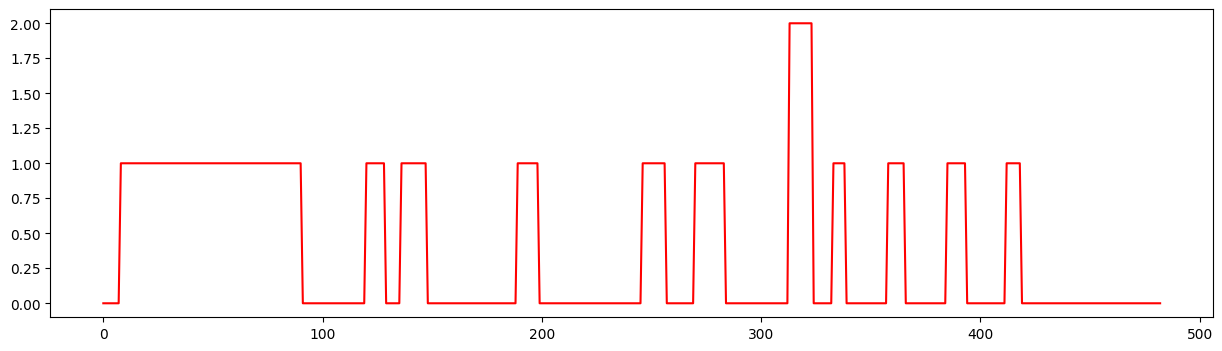

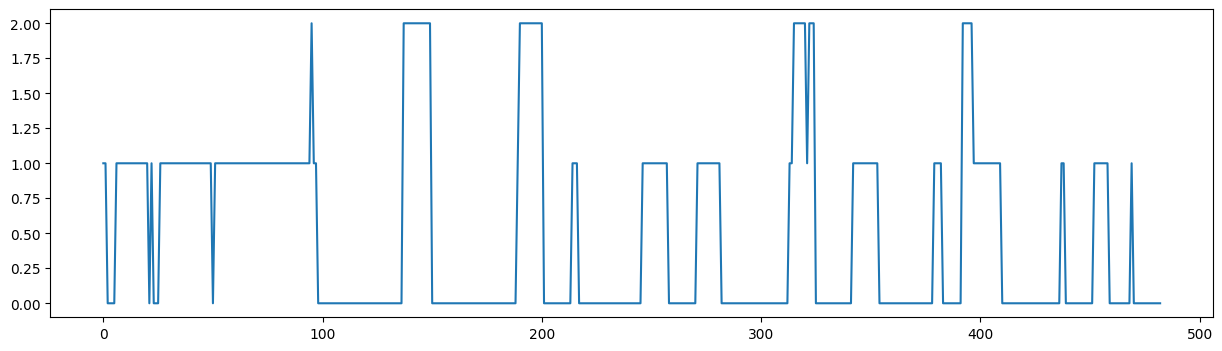

In [26]:
import pandas as pd
dir="C:\\Users\\Administrator\\Desktop\\H213.xlsx"
jieguo=pd.read_excel(dir)
plt.figure(figsize=(15,4))
plt.plot(jieguo["真值"],color="r")
plt.show()
plt.figure(figsize=(15,4))
plt.plot(jieguo["预测值"])
plt.show()

In [58]:
import pandas as pd
dir="C:\\Users\\Administrator\\Desktop\\H208.xlsx"
jieguo2=pd.read_excel(dir)
# #目标值分析
import numpy as np
Y_scale2 =jieguo2[kuangwu].to_numpy()
Y_scale2=np.array(Y_scale2)
Y_scale2=Y_scale2.reshape(-1,1)
X_scale2=jieguo2[kww].to_numpy()
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler(feature_range=(0, 1))
X_scale2 = scaler2.fit_transform(X_scale2)
pd.DataFrame(clf.predict(X_scale2)).to_excel("C:\\Users\\Administrator\\Desktop\\208(全井预测).xlsx")

In [61]:
# 导入包
import joblib 

# 保存模型
joblib.dump(clf,'C:\\Users\\Administrator\\Desktop\\H208\\预测模型.dat')  # 第二个参数只需要写文件名字,是不是比pickle更人性化

# 加载模型
loaded_model2 = joblib.load('C:\\Users\\Administrator\\Desktop\\H208\\预测模型.dat')

# 使用模型
pd.DataFrame(loaded_model2.predict(X_scale2)).to_excel("C:\\Users\\Administrator\\Desktop\\208(全井预测2).xlsx")


In [403]:
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 绘制图像
sns.set_style('white')  # 设置风格
sns.set_style("ticks")
config = {
    "font.family": 'serif',
    "font.size": 15,
    "mathtext.fontset": 'stix',
    "font.serif": ['SimSun'],
}
plt.rcParams.update(config)

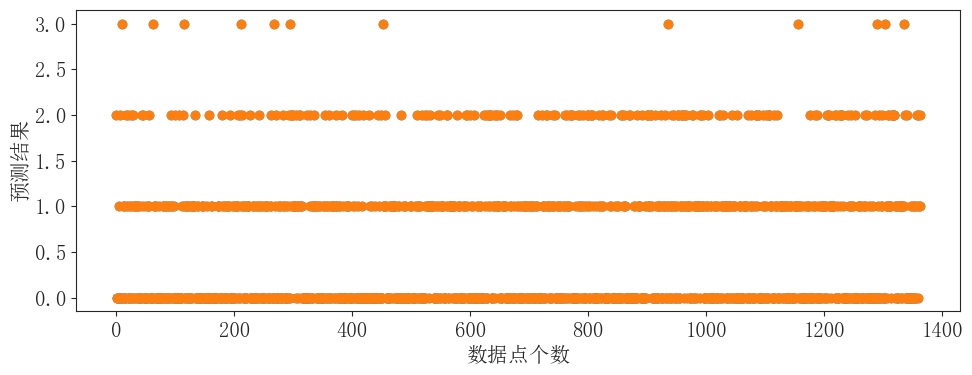

In [452]:
import matplotlib.pyplot as plt
le=[x for x in range(len(y_train))]
plt.figure(figsize=(10,4))
plt.scatter(le,y_train)
plt.scatter(le,clf.predict(X_train))
plt.xlabel('数据点个数', fontsize=15)  # x轴名称
plt.ylabel('预测结果', fontsize=15)  # y轴名称
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("C:\\Users\\Administrator\\Desktop\\训练集预测.svg", bbox_inches = 'tight')

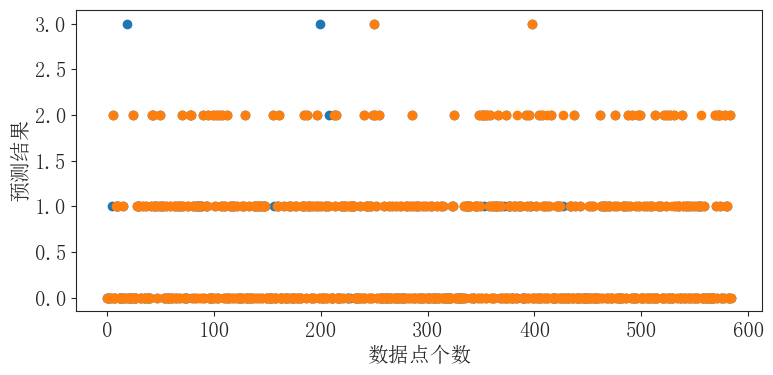

In [453]:
import matplotlib.pyplot as plt
le=[x for x in range(len(y_test))]
plt.figure(figsize=(8,4))
plt.scatter(le,y_test)
plt.scatter(le,clf.predict(X_test))
plt.xlabel('数据点个数', fontsize=15)  # x轴名称
plt.ylabel('预测结果', fontsize=15)  # y轴名称
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("C:\\Users\\Administrator\\Desktop\\测试集预测.svg", bbox_inches = 'tight')

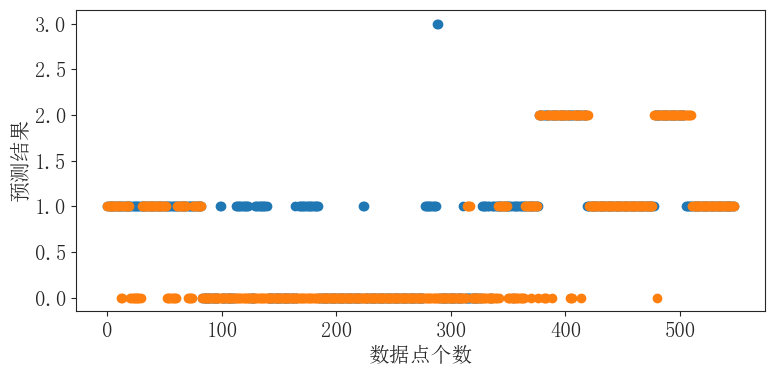

In [454]:
yc=pd.read_excel("C:\\Users\\Administrator\\Desktop\H213储层预测分级次.xlsx")
le=[x for x in range(len(yc["夹层解释结果"]))]
plt.figure(figsize=(8,4))
plt.scatter(le,yc["夹层解释结果"])
plt.scatter(le,yc["夹层预测结果"])
plt.xlabel('数据点个数', fontsize=15)  # x轴名称
plt.ylabel('预测结果', fontsize=15)  # y轴名称
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("C:\\Users\\Administrator\\Desktop\\盲井H213预测.svg", bbox_inches = 'tight')

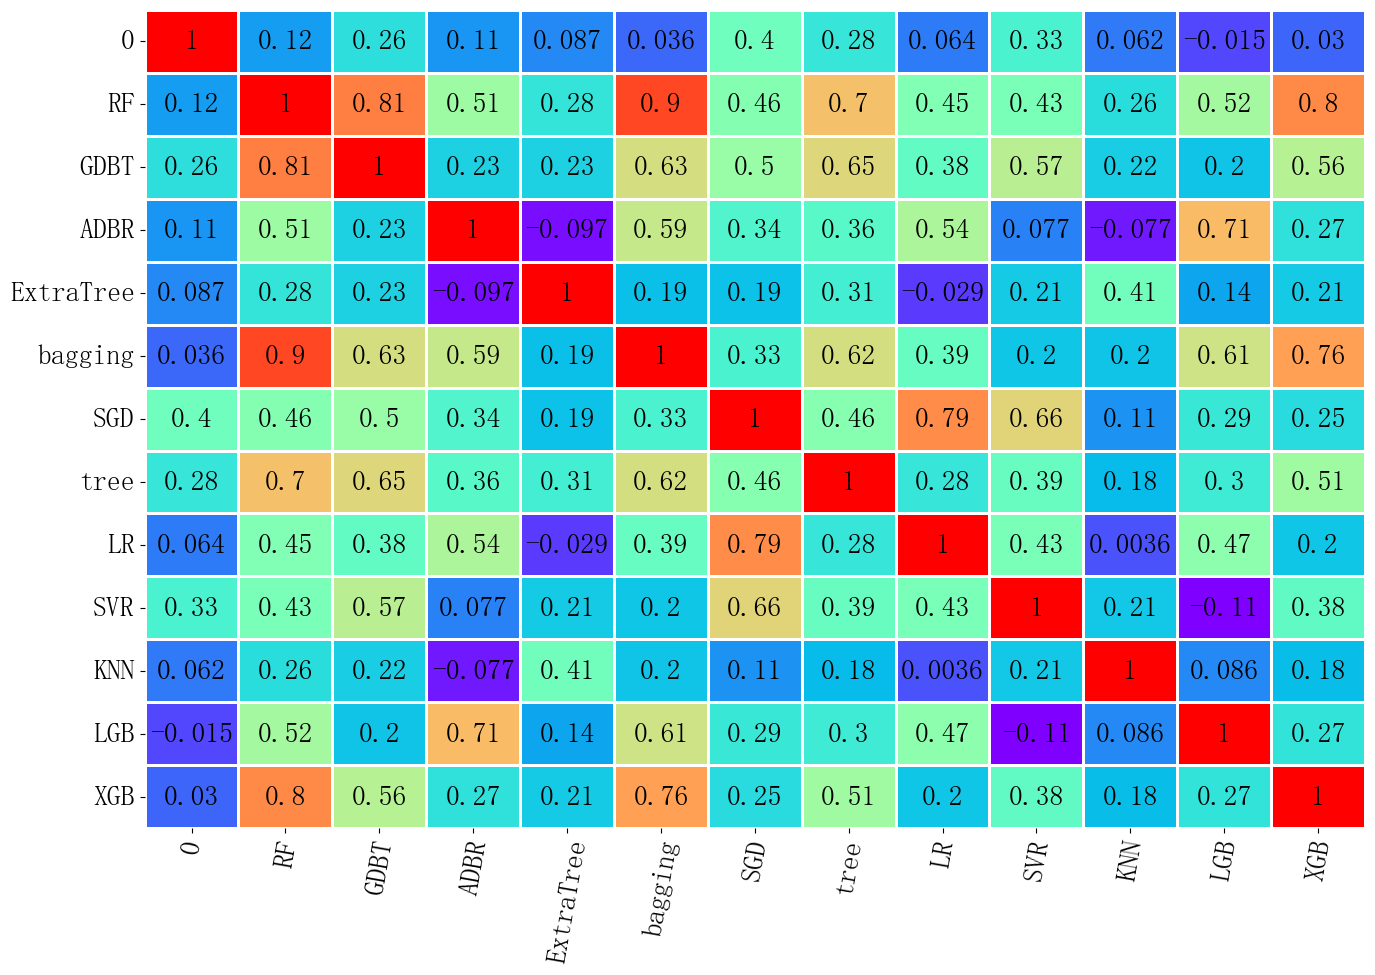

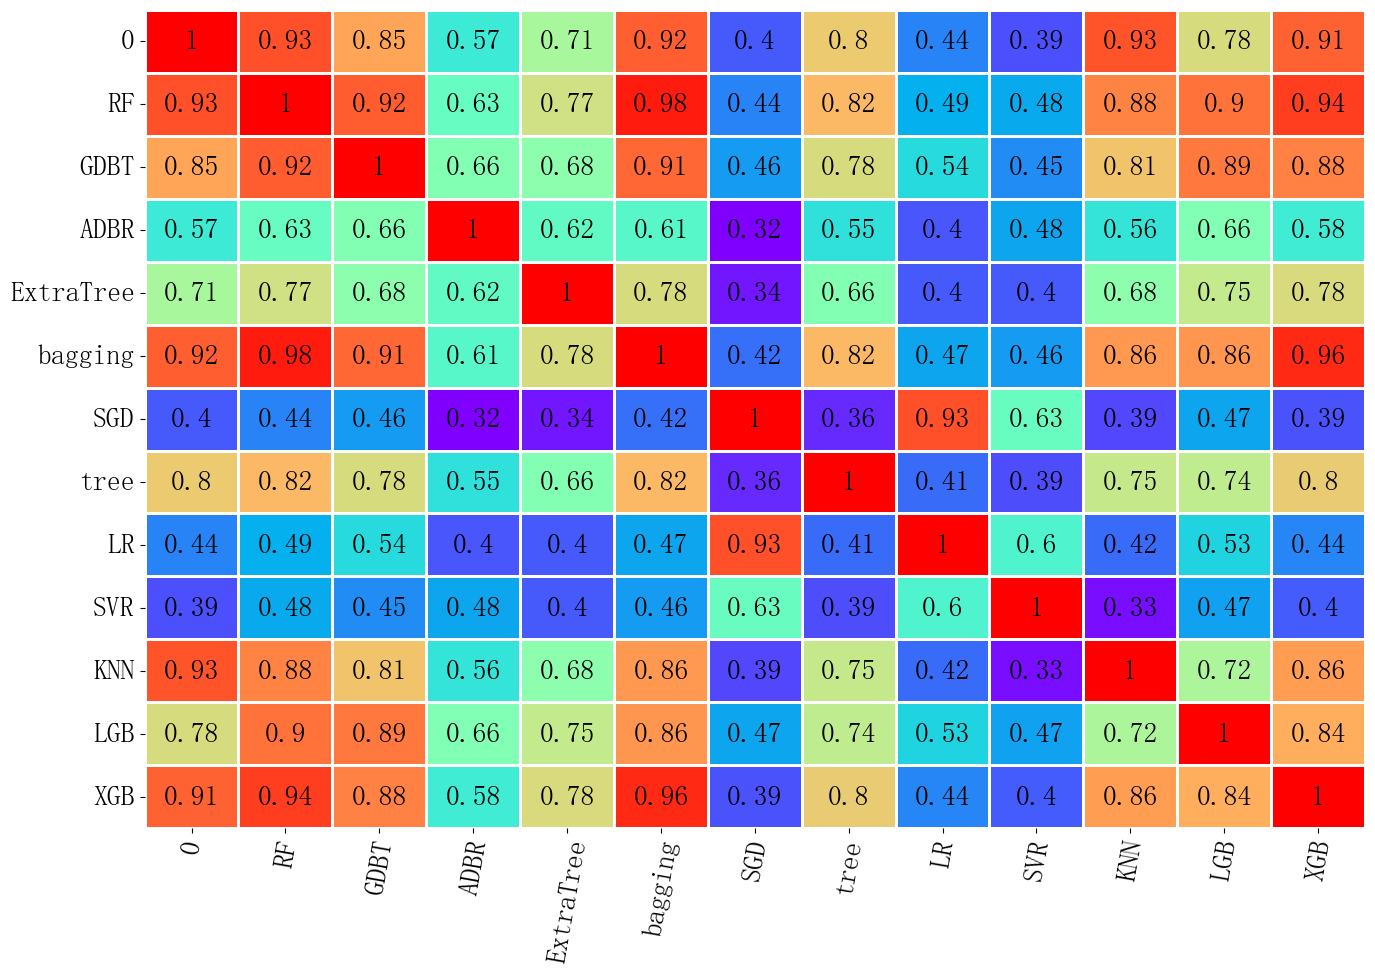

In [290]:
# 多模型预测
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn import neighbors
from sklearn import svm
from sklearn import linear_model
from sklearn import tree
from sklearn.linear_model import SGDRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings("ignore")
X_train, X_test, y_train, y_test = train_test_split(
    X_scale, Y_scale, test_size=0.1, shuffle=True)
###########GDBT################
model_GDBT = GradientBoostingRegressor(
  loss='ls', learning_rate=0.01, n_estimators=50, subsample=1, min_samples_split=2, min_samples_leaf=1, max_depth=6, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False)
# ###########随机森林################
model_RF = RandomForestRegressor(n_estimators=50)

# #################ADBR###############
model_ADBR = ensemble.AdaBoostRegressor(n_estimators=50)  # 这里使用50个决策树
###############"ExtraTree###########
model_ExtraTree = ExtraTreeRegressor()
# # #############Bagging#############
model_bagging = ensemble.BaggingRegressor()
# # # ##############SGD##############
model_SGD = SGDRegressor()
# # ##########决策树回归###############
model_tree = tree.DecisionTreeRegressor()
# # ###########线性回归#############
model_LR = linear_model.LinearRegression()
# model.fit(X_scale, Y_scale)
# df2=pd.DataFrame(scaler.inverse_transform(model.predict(X_scale1).reshape(-1,1)))
# df2["准确值"]=pd.DataFrame(scaler.inverse_transform(Y_scale1))
# plt.plot(scaler.inverse_transform(model.predict(X_scale1).reshape(-1,1))-scaler.inverse_transform(Y_scale1))
# k=0
# for x in (scaler.inverse_transform(model.predict(X_scale1).reshape(-1,1))-scaler.inverse_transform(Y_scale1)) :
#     if np.abs(x) >=2:
#          k=k+1
# print(1-k/49)

# # ################SVM回归#########33
model_SVR = svm.SVR()
# ################KNN回归##########333
# weights="distance"
model_KNN = neighbors.KNeighborsRegressor()
# ######################LG#######################
import lightgbm as lgb
model_LGB =lgb.LGBMRegressor(learning_rate=0.01)
###########################MLP#####################
from sklearn.neural_network import MLPRegressor
model_mlp = MLPRegressor(
    hidden_layer_sizes=(2, 2),  activation='relu', solver='adam', alpha=0.0001, batch_size="auto",
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=5000, shuffle=True,
    random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
###########################CAT###############
from catboost import CatBoostRegressor
Model_Cat=CatBoostRegressor()
##########
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
Model_His= HistGradientBoostingRegressor()
################################XGB##############
from xgboost import XGBRegressor
Model_XGB=XGBRegressor()
#####################################
Model_name = [model_RF,
model_GDBT,
model_ADBR,
model_ExtraTree,
model_bagging,
model_SGD,
model_tree,
model_LR,
model_SVR,
model_KNN,
model_LGB,
Model_XGB]
l=-1
Model_MZ=["RF","GDBT","ADBR","ExtraTree","bagging","SGD","tree","LR","SVR","KNN","LGB","XGB"]
# Model_MZ[2]
df_NEW=pd.DataFrame(y_test)
df_old=pd.DataFrame(Y_scale1)
for x in Model_name:
    l=l+1
    x.fit(X_train, y_train)
    df_NEW[Model_MZ[l]]=pd.DataFrame(x.predict(X_test).reshape(-1,1))
    df_old[Model_MZ[l]]=pd.DataFrame(x.predict(X_scale1).reshape(-1,1))
#     plt.plot(scaler.inverse_transform(x.predict(X_scale1).reshape(-1,1))-scaler.inverse_transform(Y_scale1),"r")
#     plt.show()
#     k=0
#     for j in (scaler.inverse_transform(x.predict(X_scale1).reshape(-1,1))-scaler.inverse_transform(Y_scale1)) :
#         if np.abs(j) >=2:
#              k=k+1
#     print(k,str(x)+"的模型准确率为:",1-k/49)
#     print(df_NEW)
#     print( type(Model_MZ[l]))
import seaborn as sns
# df_xainguan=df[["DT","CNC","DEN","RS","SP","GR", "钾长石", "斜长石", "高岭石"]]
corr =df_old.corr()
f, ax = plt.subplots(figsize=(14,10))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
config = {
            "font.family": 'serif',
            "font.size": 15,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
plt.rcParams.update(config)
# sns.heatmap(corr,cmap='rainbow', linewidths = 1, annot=True, annot_kws={'size':15, 'color':'black'},cbar_kws={ "orientation": "horizontal"})
h = sns.heatmap(corr,
                cmap='rainbow',
                linewidths=1,
                cbar=False,
                annot=True,
                annot_kws={
                    'size': 20,
                    'color': 'black'
                })
# sns.heatmap(corr,annot=True, xticklabels= True, yticklabels= True, square=False)
# cb = h.figure.colorbar(h.collections[0])
# cb.ax.tick_params(labelsize=20)
plt.xticks(rotation=80)
plt.tick_params(labelsize=20)
plt.tight_layout()
# plt.savefig("C:\\Users\\Administrator\\Desktop\\项目文件\\高岭石.svg")
plt.show()
corr =df_NEW.corr()
f, ax = plt.subplots(figsize=(14,10))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
config = {
            "font.family": 'serif',
            "font.size": 15,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
plt.rcParams.update(config)
# sns.heatmap(corr,cmap='rainbow', linewidths = 1, annot=True, annot_kws={'size':15, 'color':'black'},cbar_kws={ "orientation": "horizontal"})
h = sns.heatmap(corr,
                cmap='rainbow',
                linewidths=1,
                cbar=False,
                annot=True,
                annot_kws={
                    'size': 20,
                    'color': 'black'
                })
# sns.heatmap(corr,annot=True, xticklabels= True, yticklabels= True, square=False)
# cb = h.figure.colorbar(h.collections[0])
# cb.ax.tick_params(labelsize=20)
plt.xticks(rotation=80)
plt.tick_params(labelsize=20)
plt.tight_layout()
# plt.savefig("C:\\Users\\Administrator\\Desktop\\项目文件\\高岭石.svg")
plt.show()